<a href="https://colab.research.google.com/github/sunnyskydream/ML-practice/blob/main/2_1_A_Unsupervised_Learning_Cluster_Analysis_(k_means).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set() 
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv('sample_data_transformed.csv')
df.head()
#df.columns
#df.shape

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,PNRLocatorID,PaxName,TicketNum,CouponSeqNbr,ServiceStartCity,ServiceEndCity,PNRCreateDate,ServiceStartDate,EncryptedName,GenderCode,birthdateid,Age,PostalCode,BkdClassOfService,TrvldClassOfService,BookingChannel,BaseFareAmt,TotalDocAmt,UFlyRewardsNumber,UflyMemberStatus,CardHolder,BookedProduct,EnrollDate,MarketingFlightNbr,MarketingAirlineCode,StopoverCode,uid,age_group,true_origins,final_destination,round_trip,group_size,group,seasonality,days_pre_booked,true_destination
0,1,AADMLF,PETEJO,3.377490e+12,1,MSP,DFW,9/15/14,10/6/14,504554455244696420493F7C2067657420746869732072...,M,39209,57,55439,Coach,Coach,Outside Booking,88.43,109.16,201370982,Standard,False,CWT971,03:15.0,501,SY,NaN,504554455244696420493F7C2067657420746869732072...,55+,MSP,DFW,0,1,0,Q4,21,DFW
1,2,AAFBOM,FIXSMO,3.372110e+12,2,JFK,MSP,7/22/14,8/19/14,46495853454E44696420493F7C20676574207468697320...,F,42171,48,56044,Coach,Coach,SCA Website Booking,399.07,457.20,211034132,Standard,False,SSWMIR,31:24.0,248,SY,O,46495853454E44696420493F7C20676574207468697320...,35-54,MSP,MSP,1,1,0,Q3,28,JFK
2,3,AAFBOM,FIXSMO,3.372110e+12,1,MSP,JFK,7/22/14,8/14/14,46495853454E44696420493F7C20676574207468697320...,F,42171,48,56044,Coach,Coach,SCA Website Booking,399.07,457.20,211034132,Standard,False,SSWMIR,31:24.0,247,SY,NaN,46495853454E44696420493F7C20676574207468697320...,35-54,MSP,MSP,1,1,0,Q3,23,JFK
3,4,AAFILI,SCUTKA,3.372110e+12,2,MSP,SEA,2/6/14,3/27/14,534355545444696420493F7C2067657420746869732072...,F,50355,26,NaN,Coach,Coach,SCA Website Booking,118.14,149.00,0,non-ufly,NaN,NaN,NaN,281,SY,X,534355545444696420493F7C2067657420746869732072...,25-34,LAN,SEA,0,2,1,Q1,49,MSP
4,5,AAFILI,SCUTKA,3.372110e+12,1,LAN,MSP,2/6/14,3/27/14,534355545444696420493F7C2067657420746869732072...,F,50355,26,NaN,Coach,Coach,SCA Website Booking,118.14,149.00,0,non-ufly,NaN,NaN,NaN,260,SY,NaN,534355545444696420493F7C2067657420746869732072...,25-34,LAN,SEA,0,2,1,Q1,49,MSP


In [ ]:
#use group_size & days_pre_booked
y = df.iloc[:,[33,35]].values
print(y)

[[ 0 21]
 [ 0 28]
 [ 0 23]
 ...
 [ 1 73]
 [ 0 16]
 [ 0 20]]


In [ ]:
#normalization
sc = StandardScaler()
sc.fit(y)
y_std = sc.transform(y)
y_std

array([[-1.21310889, -0.68760278],
       [-1.21310889, -0.55358509],
       [-1.21310889, -0.64931201],
       ...,
       [ 0.82432831,  0.3079572 ],
       [-1.21310889, -0.7833297 ],
       [-1.21310889, -0.70674816]])

In [ ]:
kmeans3 = KMeans(n_clusters = 3)
y_std_kmeans3 = kmeans3.fit_predict(y_std)

print(y_std_kmeans3)
print(kmeans3.inertia_)

kmeans3.cluster_centers_

[0 0 0 ... 1 0 0]
11552.916453523618


array([[-1.21310889, -0.41597881],
       [ 0.82432831, -0.26916797],
       [ 0.58226651,  1.86563263]])

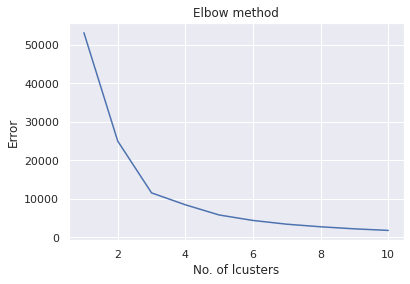

In [ ]:
Error = []

for i in range(1,11):
  kmeans = KMeans(n_clusters = i).fit(y_std)
  kmeans.fit(y_std)
  Error.append(kmeans.inertia_)

plt.plot(range(1,11), Error)
plt.title('Elbow method')
plt.xlabel('No. of lcusters')
plt.ylabel('Error')
plt.show()

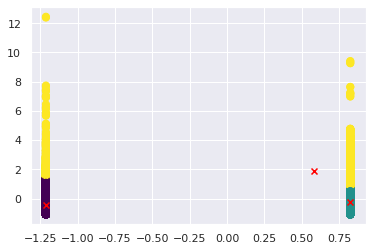

In [ ]:
plt.scatter(y_std[:,0],y_std[:,1], c=y_std_kmeans3, s = 50, cmap = "viridis")

plt.scatter(kmeans3.cluster_centers_[:, 0], kmeans3.cluster_centers_[:, 1], c='red', marker='x')

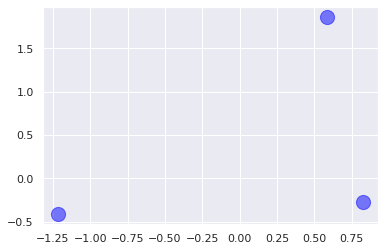

In [ ]:
centers = kmeans3.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='blue', s=200, alpha=0.5);

In [ ]:
y_pred = kmeans.predict(y_std)
y_pred

array([1, 1, 1, ..., 3, 1, 1], dtype=int32)